In [41]:
import numpy as np
import pandas as pd

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [42]:
df = pd.read_csv('..\\..\\Datasets\\titanic_train.csv', usecols=['Age','Fare','Survived'])

In [43]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [44]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

C:\Users\Acer1\AppData\Local\Temp\ipykernel_29540\1698716155.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


In [45]:
df.sample()

,Survived,Age,Fare
431,1,29.699118,16.1


In [46]:
X = df.iloc[:,1:3]
y = df.iloc[:,0]

In [47]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

# Vizualization of the Data

C:\Users\Acer1\AppData\Local\Temp\ipykernel_29540\3574968202.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])


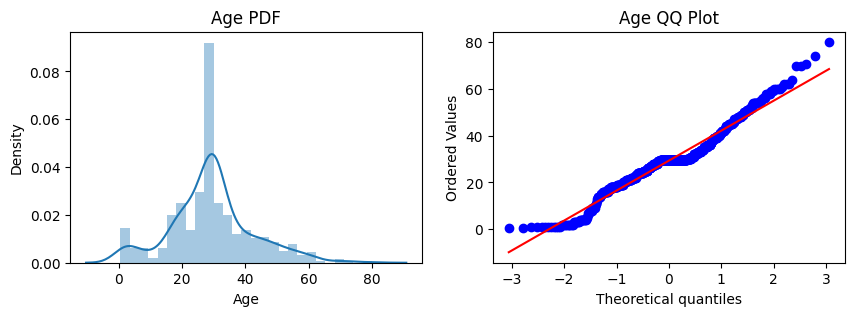

In [48]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
sns.distplot(X_train['Age'])
plt.title('Age PDF')

plt.subplot(1,2,2)
stats.probplot(X_train['Age'],dist='norm', plot=plt)
plt.title('Age QQ Plot')

plt.show()

C:\Users\Acer1\AppData\Local\Temp\ipykernel_29540\4178580178.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'])


Text(0.5, 1.0, 'Fare QQ Plot')

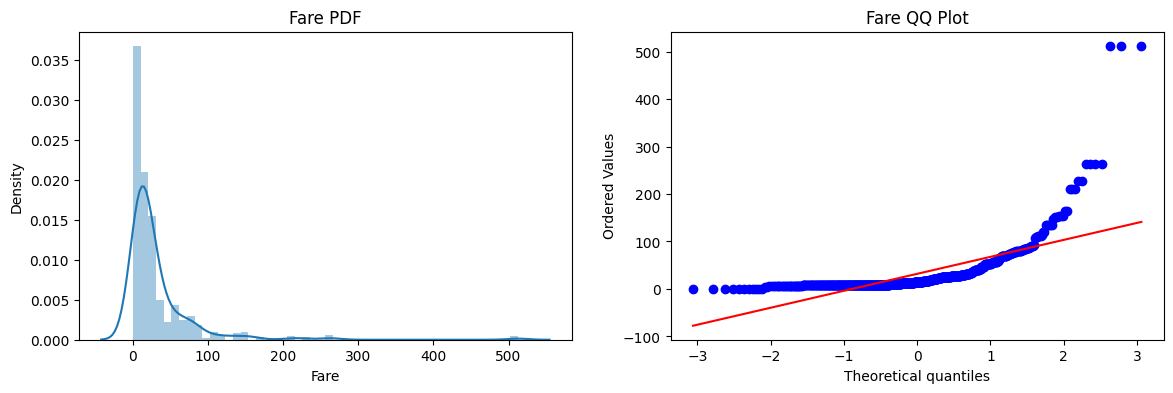

In [49]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.distplot(X_train['Fare'])
plt.title('Fare PDF')

plt.subplot(1,2,2)
stats.probplot(X_train['Fare'], dist='norm', plot=plt)
plt.title('Fare QQ Plot')

# Before Transforming

In [50]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf1.fit(X_train,y_train)
clf2.fit(X_train,y_train)

y_pred1 = clf1.predict(X_test)
y_pred2 = clf2.predict(X_test)
y_pred1, y_pred2

print(f'Accuracy by LR= {accuracy_score(y_test,y_pred1) * 100}')
print(f'Accuracy by DT= {accuracy_score(y_test,y_pred2) * 100}')


Accuracy by LR= 65.29850746268657
Accuracy by DT= 66.7910447761194


# Applying transformation

In [52]:
trf = FunctionTransformer(func=np.log1p)
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf1.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)

y_pred1 = clf1.predict(X_test_transformed)
y_pred2 = clf2.predict(X_test_transformed)

print(f'Accuracy by LR= {accuracy_score(y_test,y_pred1) * 100}')
print(f'Accuracy by DT= {accuracy_score(y_test,y_pred2) * 100}')

Accuracy by LR= 67.91044776119402
Accuracy by DT= 66.7910447761194


# Cross Validation

In [54]:
X_transformed = trf.fit_transform(X)
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

print(f'LR: {np.mean(cross_val_score(clf1, X_transformed, y, scoring='accuracy', cv=10) * 100)}')
print(f'DT: {np.mean(cross_val_score(clf2, X_transformed, y, scoring='accuracy', cv=10) * 100)}')

LR: 67.80274656679151
DT: 66.11111111111111


# QQ plot of Fare before and after log transformed

Text(0.5, 1.0, 'Fare after log')

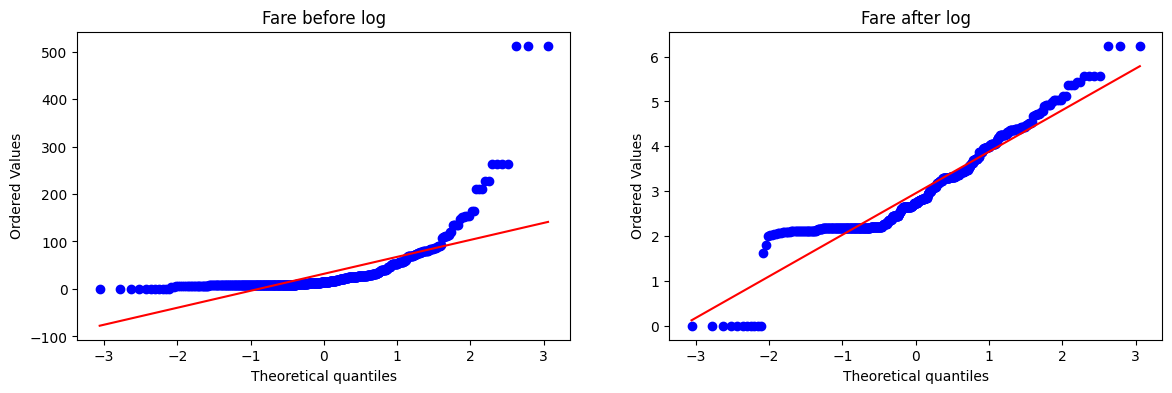

In [58]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
stats.probplot(X_train['Fare'], dist='norm', plot = plt)
plt.title('Fare before log')

plt.subplot(1,2,2)
stats.probplot(X_train_transformed['Fare'], dist='norm', plot = plt)
plt.title('Fare after log')

# QQ plot of Age before and after log transformed

Text(0.5, 1.0, 'Age after log')

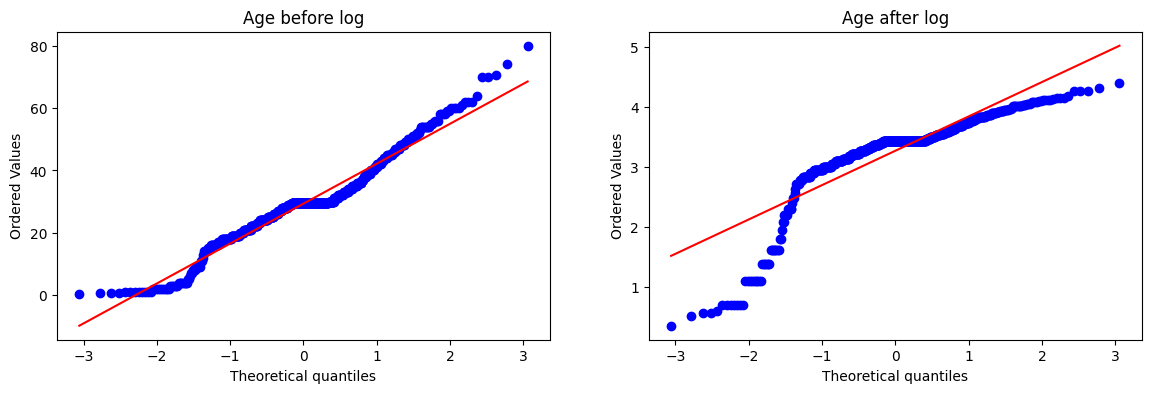

In [59]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
stats.probplot(X_train['Age'], dist='norm', plot = plt)
plt.title('Age before log')

plt.subplot(1,2,2)
stats.probplot(X_train_transformed['Age'], dist='norm', plot = plt)
plt.title('Age after log')

# Applying log transform to Fare only

In [63]:
trf2 = ColumnTransformer(transformers=[
                        ('log', FunctionTransformer(func=np.log1p), ['Fare'])
                        ],
                        remainder='passthrough')
X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)

clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf1.fit(X_train_transformed2,y_train)
clf2.fit(X_train_transformed2,y_train)

y_pred1 = clf1.predict(X_test_transformed2)
y_pred2 = clf2.predict(X_test_transformed2)

print(f'Accuracy by LR= {accuracy_score(y_test,y_pred1) * 100}')
print(f'Accuracy by DT= {accuracy_score(y_test,y_pred2) * 100}')


Accuracy by LR= 66.4179104477612
Accuracy by DT= 66.7910447761194


# Cross val score to the new data

In [64]:
X_transformed2 = trf2.fit_transform(X)

clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

print(f'Accuracy by LR: {np.mean(cross_val_score(clf1,X_transformed2, y , scoring='accuracy', cv=10))}')
print(f'Accuracy by DT: {np.mean(cross_val_score(clf2,X_transformed2, y , scoring='accuracy', cv=10))}')

Accuracy by LR: 0.6712609238451936
Accuracy by DT: 0.6565792759051187
